# Car Maintenance Cost Prediction

The Car Maintenance Cost Prediction module is designed to provide users with insights into the anticipated maintenance costs associated with owning a specific vehicle. This predictive system utilizes machine learning algorithms to analyze various factors that influence maintenance expenses, enabling users to make informed decisions about their vehicle ownership.

## Understanding variables

1. **slno:** Serial number or identifier for each entry.
2. **vehicle_type:** Type of vehicle (e.g., 'car', 'truck', 'SUV', etc.).
3. **brand:** Brand or manufacturer of the vehicle (e.g., 'honda', 'toyota', etc.).
4. **model:** Specific model of the vehicle (e.g., 'jazz', 'civic', etc.).
5. **engine_type:** Type of engine fuel used (e.g., 'petrol', 'diesel', etc.).
6. **make_year:** Year when the vehicle was manufactured.
7. **region:** Geographical region associated with the vehicle (e.g., 'chennai', 'mumbai', etc.).
8. **mileage_range:** Range of mileage covered by the vehicle.
9. **mileage:** Actual mileage or distance covered by the vehicle.
10. **oil_filter:** Indicates if the oil filter was replaced (binary indicator: 1 for replaced, 0 for not replaced).
11. **engine_oil:** Indicates if the engine oil was replaced (binary indicator: 1 for replaced, 0 for not replaced).
12. **washer_plug_drain:** Indicates if the washer plug was drained (binary indicator: 1 for drained, 0 for not drained).
13. **dust_and_pollen_filter:** Indicates if the dust and pollen filter were replaced (binary indicator: 1 for replaced, 0 for not replaced).
14. **wheel_alignment_and_balancing:** Indicates if wheel alignment and balancing were performed (binary indicator: 1 for performed, 0 for not performed).
15. **air_clean_filter:** Indicates if the air cleaning filter was replaced (binary indicator: 1 for replaced, 0 for not replaced).
16. **fuel_filter:** Indicates if the fuel filter was replaced (binary indicator: 1 for replaced, 0 for not replaced).
17. **spark_plug:** Indicates if the spark plug was replaced (binary indicator: 1 for replaced, 0 for not replaced).
18. **brake_fluid:** Indicates if the brake fluid was replaced (binary indicator: 1 for replaced, 0 for not replaced).
19. **brake_and_clutch_oil:** Indicates if brake and clutch oil were replaced (binary indicator: 1 for replaced, 0 for not replaced).
20. **transmission_fluid:** Indicates if the transmission fluid was replaced (binary indicator: 1 for replaced, 0 for not replaced).
21. **brake_pads:** Indicates if the brake pads were replaced (binary indicator: 1 for replaced, 0 for not replaced).
22. **clutch:** Indicates if the clutch was replaced (binary indicator: 1 for replaced, 0 for not replaced).
23. **coolant:** Indicates if the coolant was replaced (binary indicator: 1 for replaced, 0 for not replaced).
24. **cost:** Maintenance cost associated with the vehicle.

## Import Libraries

In [268]:
# Import libraries. begin, let's import the necessary libraries that we'll be using throughout this notebook:

# Data Manipulation Libraries
import numpy as np 
import pandas as pd 

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [269]:
# knowing the name of the dataset
import os
for dirname, _, filenames in os.walk('..\dataset\car_maintenance.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [270]:
# Load tha data.
df = pd.read_csv("..\dataset\car_maintenance.csv")
df.head()

,slno,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
0,1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,...,0,0,0,0,0,0,0,0,0,2566
1,2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,...,0,0,0,0,0,0,0,0,0,2633
2,3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,...,0,0,0,0,0,0,0,0,0,2643
3,4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,...,0,0,0,0,0,0,0,0,0,2532
4,5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,...,0,0,0,0,0,0,0,0,0,2489


## Exploratory Data Analysis

In [271]:
# Seeing the shape of the data.
df.shape

(1139, 24)

In [272]:
# Seeing if there are dublicated.
df.duplicated().sum()

0

In [273]:
# seeing if there are null values.
df.isna().sum()

slno                             0
vehicle_type                     0
brand                            0
model                            0
engine_type                      0
make_year                        0
region                           0
mileage_range                    0
mileage                          0
oil_filter                       0
engine_oil                       0
washer_plug_drain                0
dust_and_pollen_filter           0
whell_alignment_and_balancing    0
air_clean_filter                 0
fuel_filter                      0
spark_plug                       0
brake_fluid                      0
brake_and_clutch_oil             0
transmission_fluid               0
brake_pads                       0
clutch                           0
coolant                          0
cost                             0
dtype: int64

In [274]:
# Seeing information about data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   slno                           1139 non-null   int64 
 1   vehicle_type                   1139 non-null   object
 2   brand                          1139 non-null   object
 3   model                          1139 non-null   object
 4   engine_type                    1139 non-null   object
 5   make_year                      1139 non-null   int64 
 6   region                         1139 non-null   object
 7   mileage_range                  1139 non-null   int64 
 8   mileage                        1139 non-null   int64 
 9   oil_filter                     1139 non-null   int64 
 10  engine_oil                     1139 non-null   int64 
 11  washer_plug_drain              1139 non-null   int64 
 12  dust_and_pollen_filter         1139 non-null   int64 
 13  whe

In [275]:
df.columns

Index(['slno', 'vehicle_type', 'brand', 'model', 'engine_type', 'make_year',
       'region', 'mileage_range', 'mileage', 'oil_filter', 'engine_oil',
       'washer_plug_drain', 'dust_and_pollen_filter',
       'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
       'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
       'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost'],
      dtype='object')

In [276]:
categorical_features = ['vehicle_type', 'brand', 'model', 'engine_type', 'make_year', 'region']

for feature in categorical_features:
    print(df[feature].value_counts())
    print('-' * 50)

car    1139
Name: vehicle_type, dtype: int64
--------------------------------------------------
honda     979
toyota    160
Name: brand, dtype: int64
--------------------------------------------------
jazz        342
amaze       321
city        316
fortuner    160
Name: model, dtype: int64
--------------------------------------------------
diesel    659
petrol    480
Name: engine_type, dtype: int64
--------------------------------------------------
2016    658
2017    480
2018      1
Name: make_year, dtype: int64
--------------------------------------------------
mumbai     659
chennai    480
Name: region, dtype: int64
--------------------------------------------------


In [277]:
numerical_features = [
    'slno', 'mileage_range', 'mileage', 'oil_filter', 'engine_oil',
    'washer_plug_drain', 'dust_and_pollen_filter', 'whell_alignment_and_balancing',
    'air_clean_filter', 'fuel_filter', 'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
    'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost'
]

for feature in numerical_features:
    print(df[feature].value_counts())
    print('-' * 50)

1       1
758     1
764     1
763     1
762     1
       ..
386     1
387     1
388     1
389     1
1139    1
Name: slno, Length: 1139, dtype: int64
--------------------------------------------------
30000     160
10000     143
40000     142
60000     142
20000     141
50000     141
70000     138
80000      70
100000     62
Name: mileage_range, dtype: int64
--------------------------------------------------
60347     9
40282     6
30463     6
39236     5
20657     5
         ..
9075      1
11468     1
10457     1
10860     1
110757    1
Name: mileage, Length: 754, dtype: int64
--------------------------------------------------
1    1139
Name: oil_filter, dtype: int64
--------------------------------------------------
1    1139
Name: engine_oil, dtype: int64
--------------------------------------------------
1    1004
0     135
Name: washer_plug_drain, dtype: int64
--------------------------------------------------
0    821
1    318
Name: dust_and_pollen_filter, dtype: int64
-----------

### Data Visualization

#### Univariate Analysis

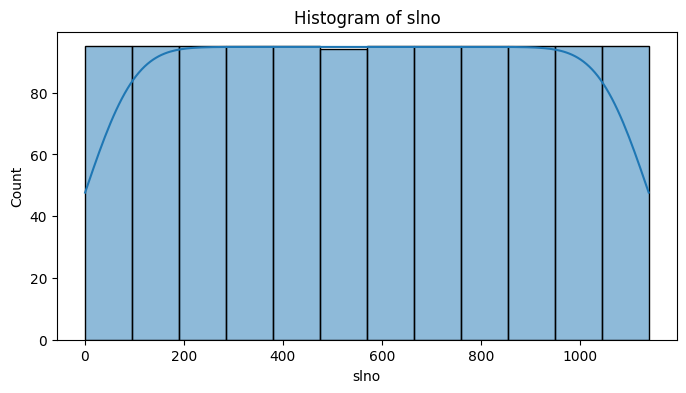

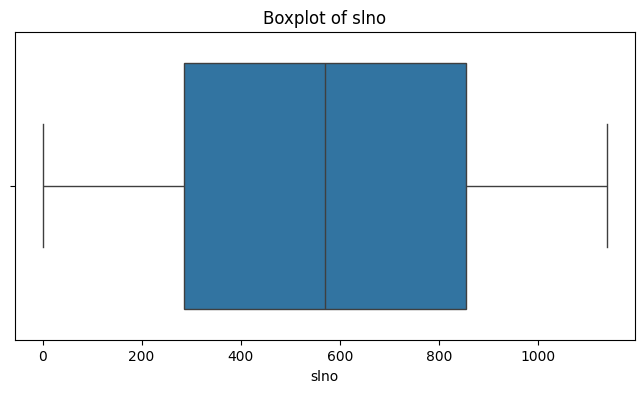

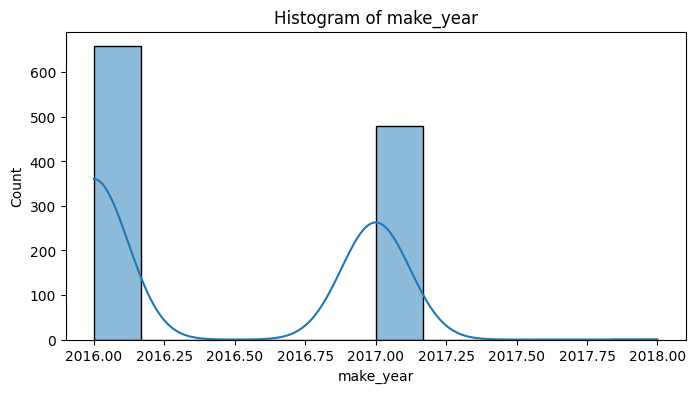

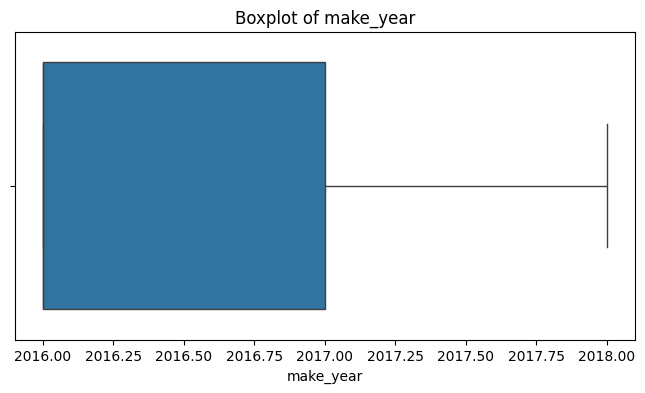

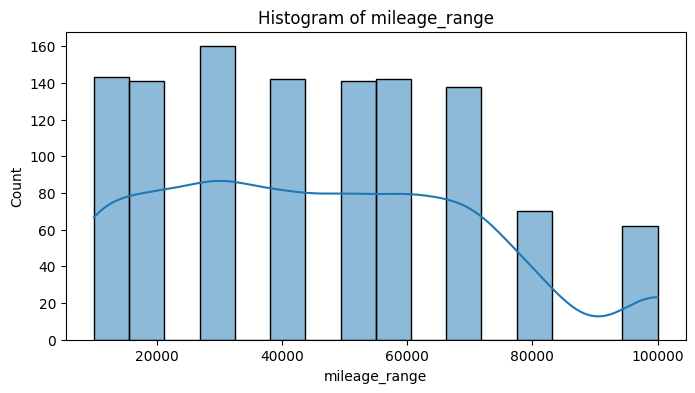

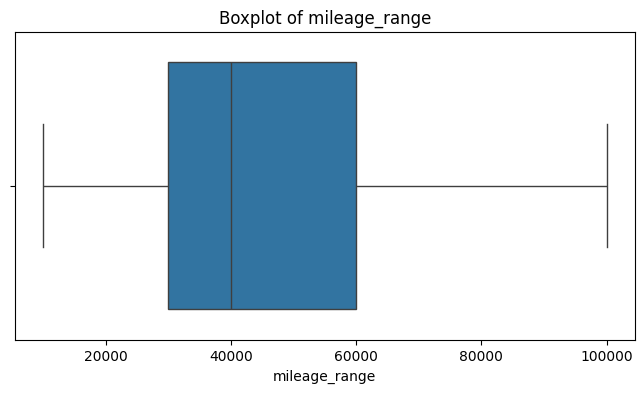

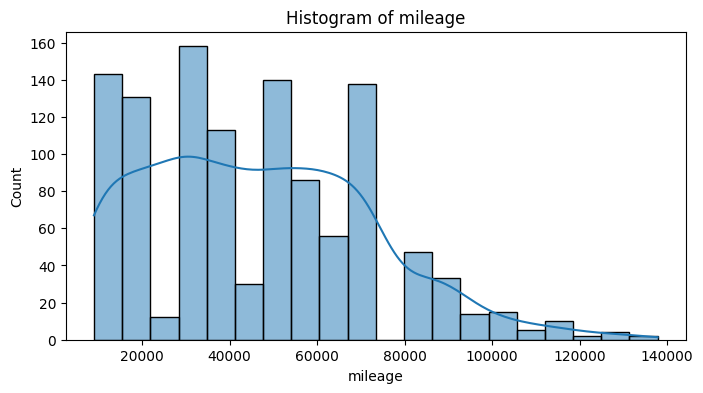

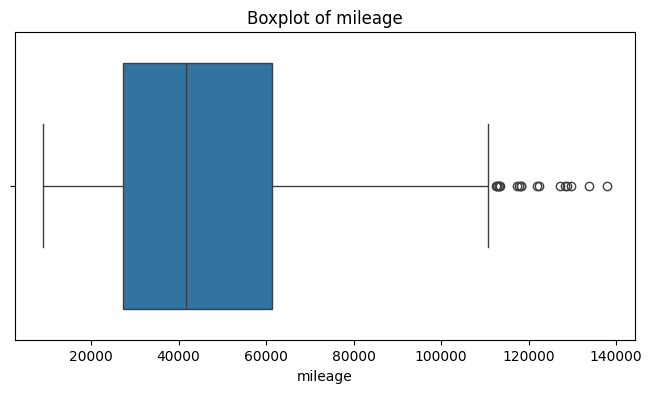

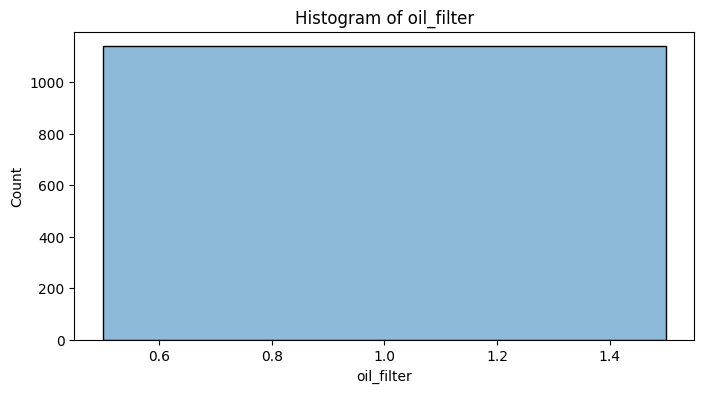

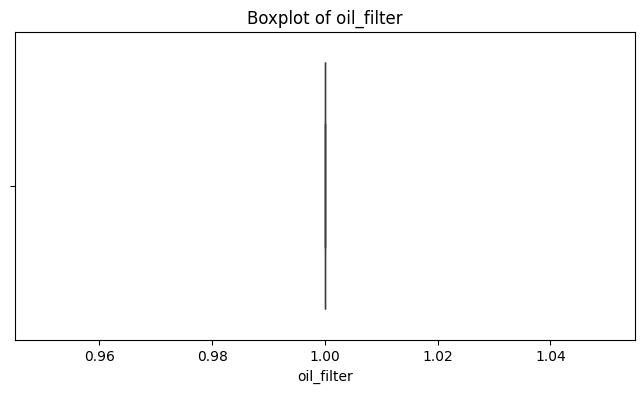

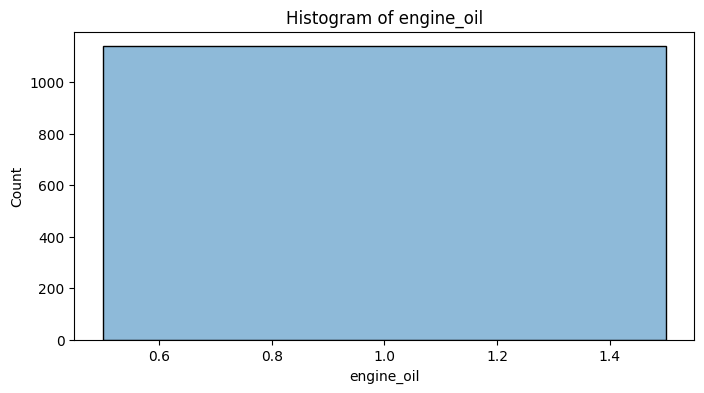

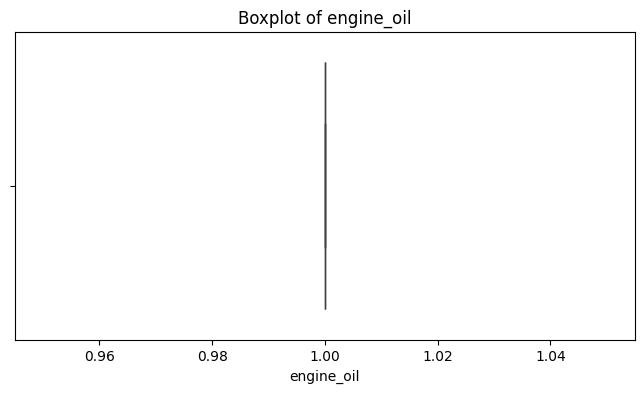

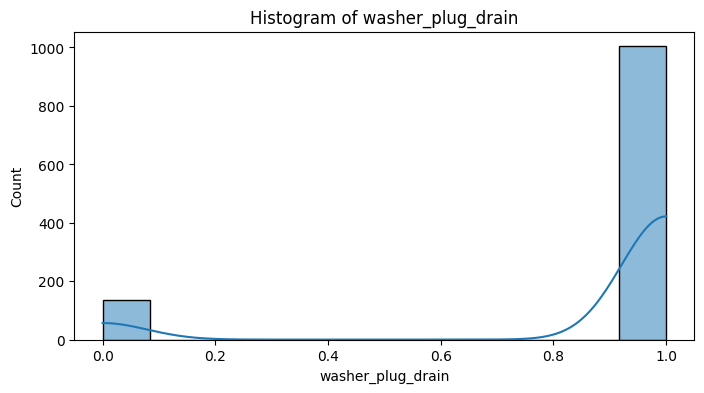

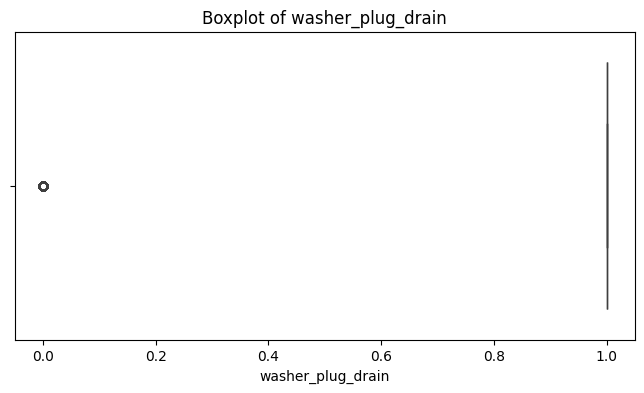

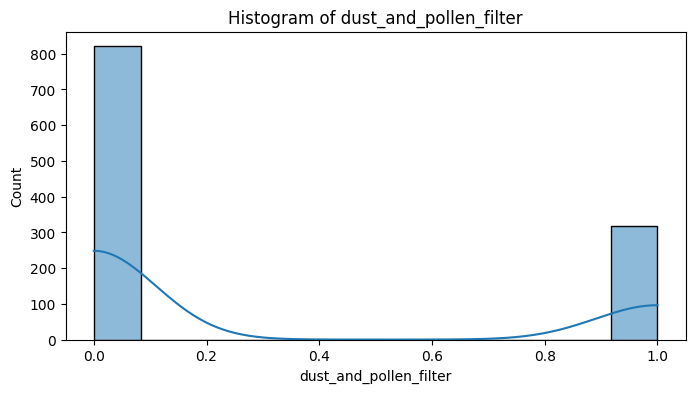

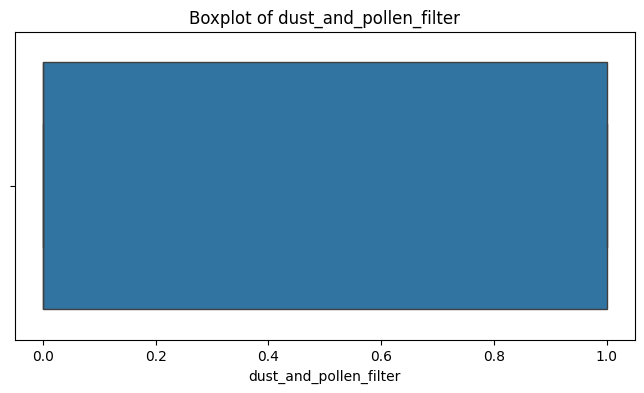

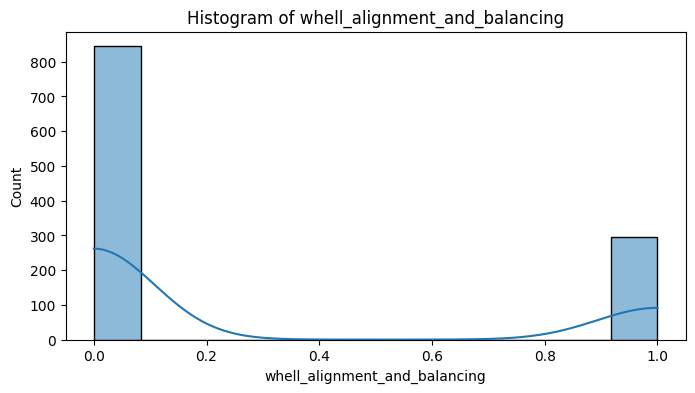

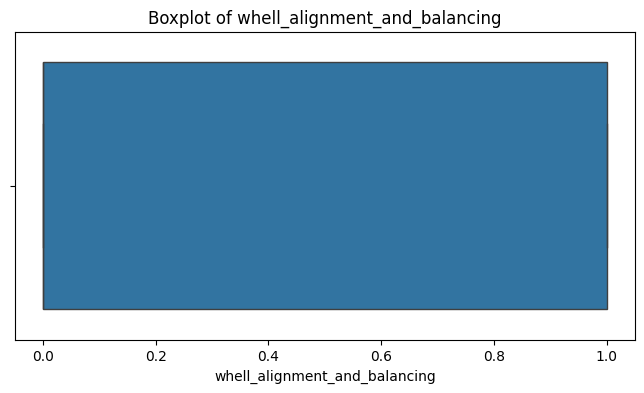

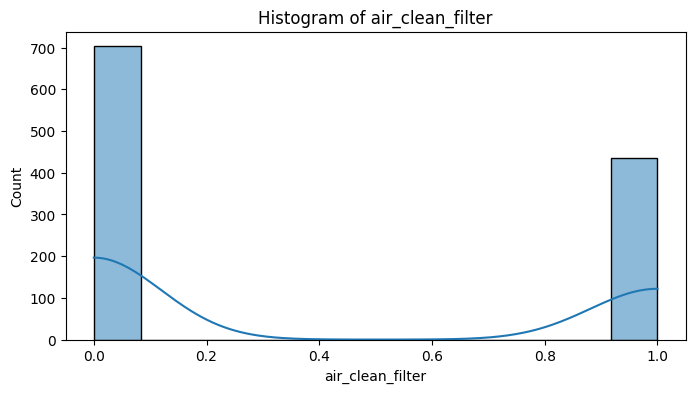

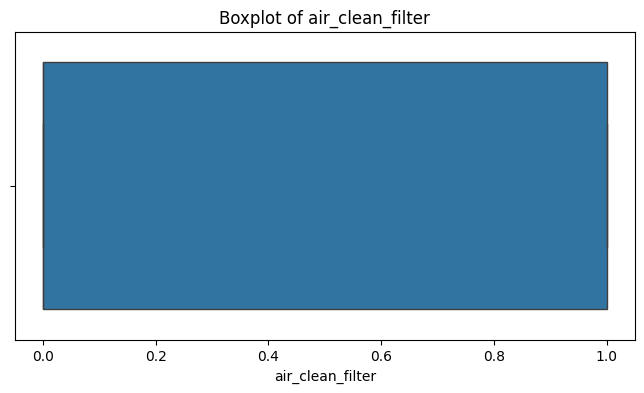

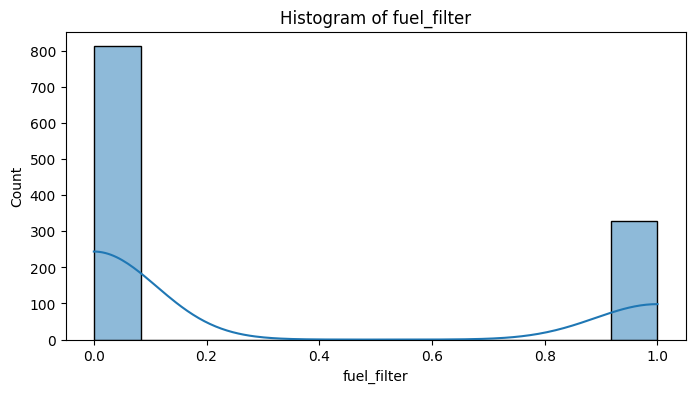

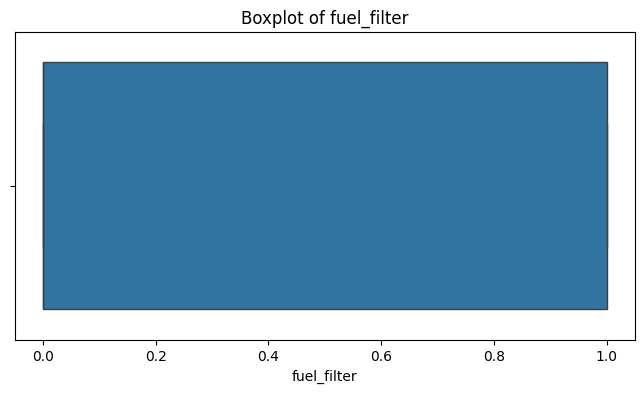

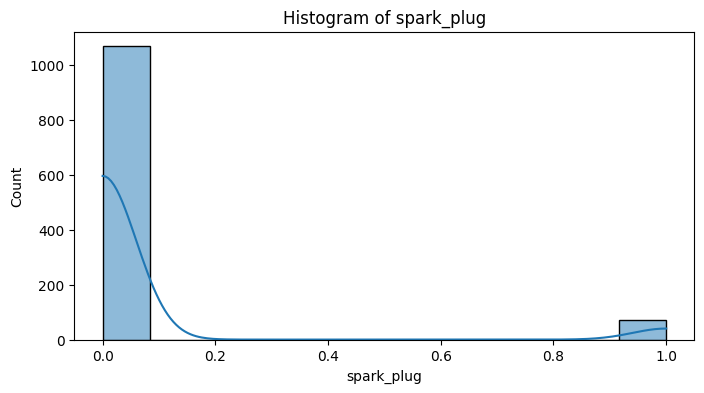

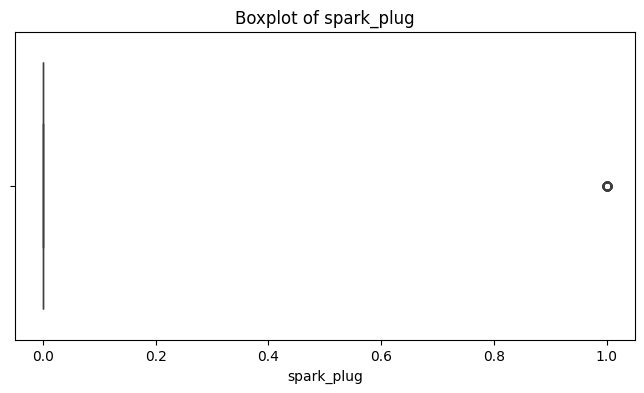

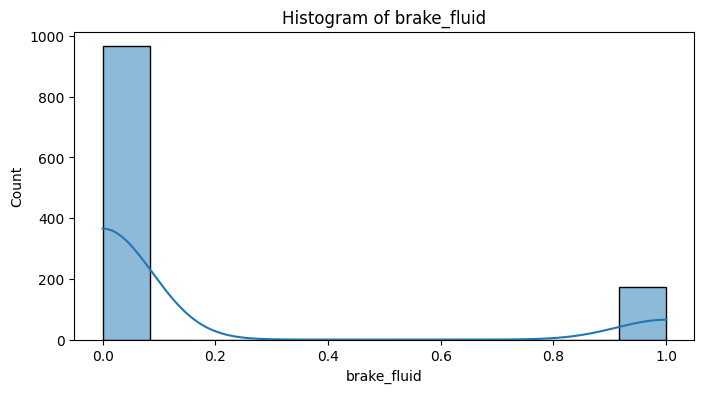

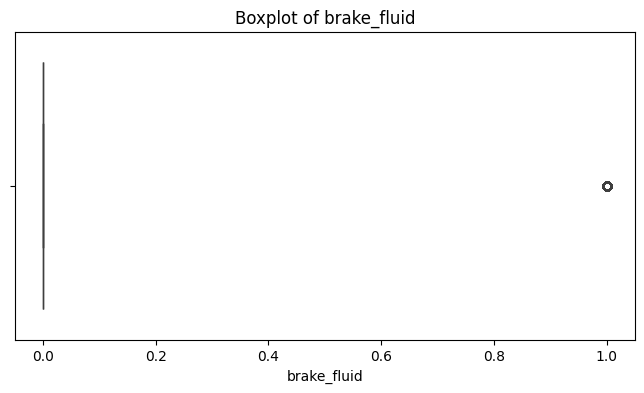

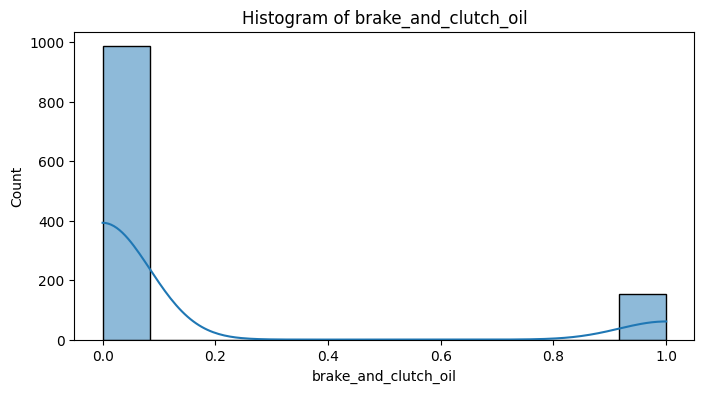

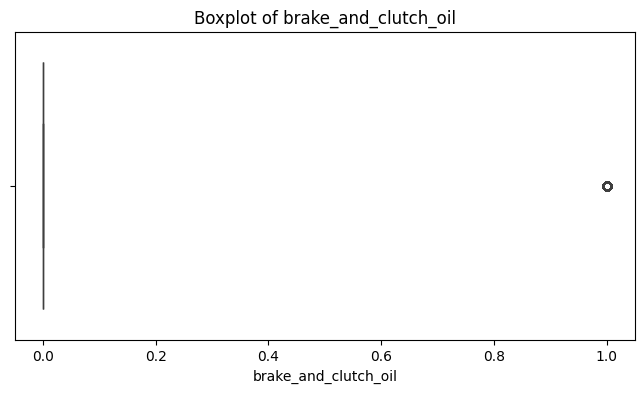

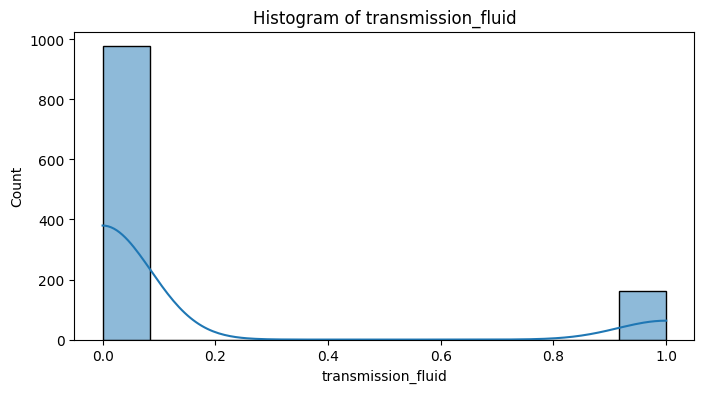

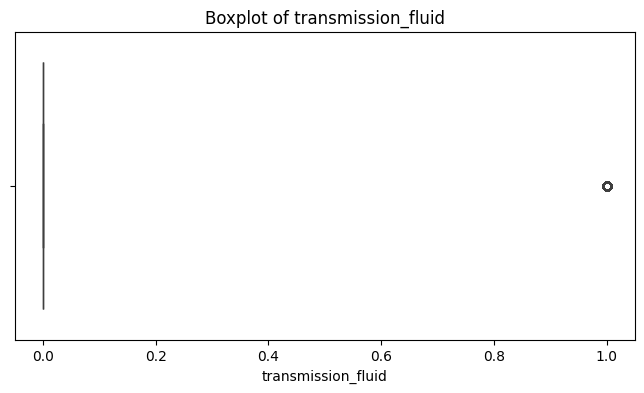

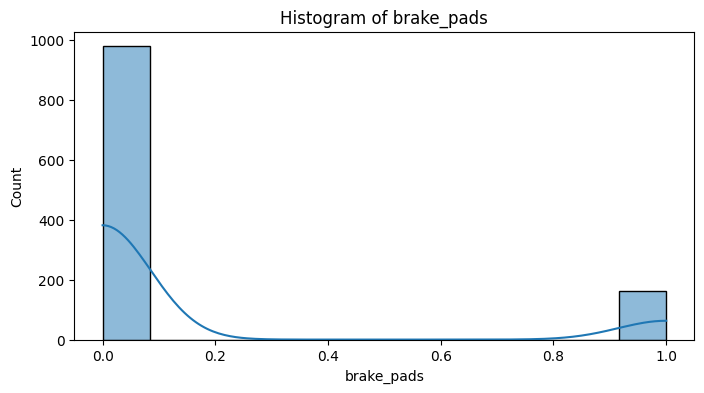

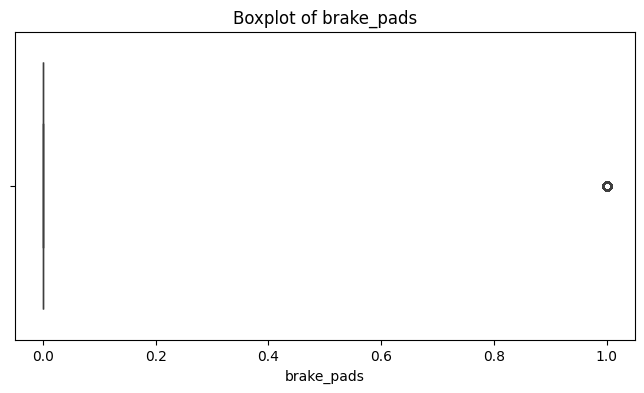

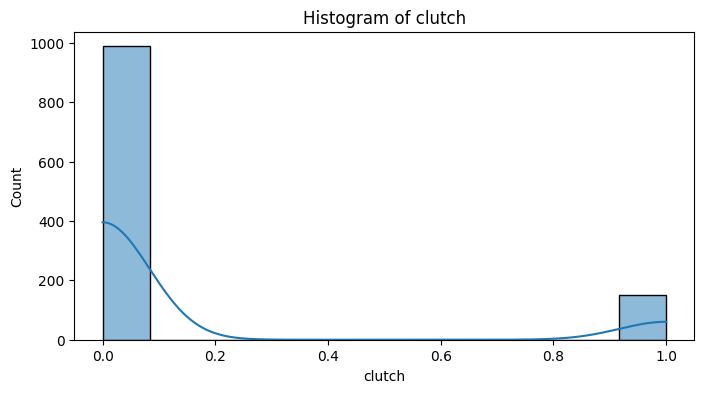

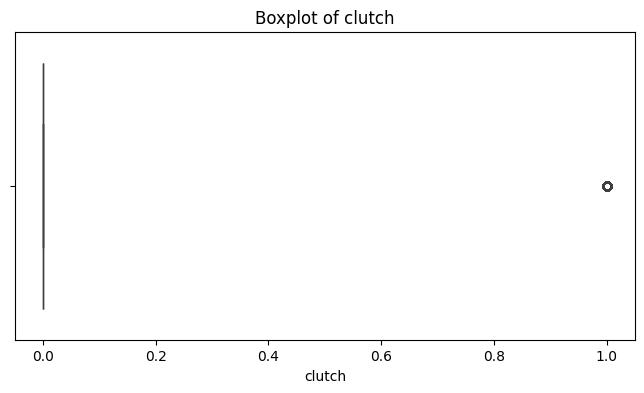

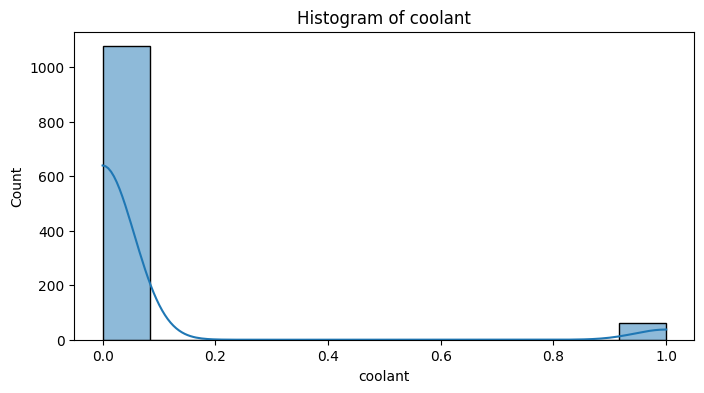

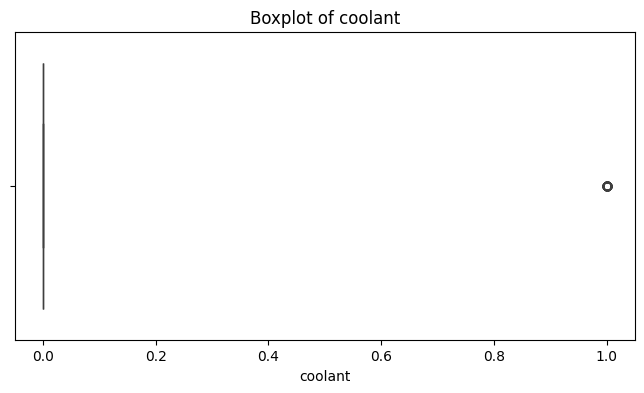

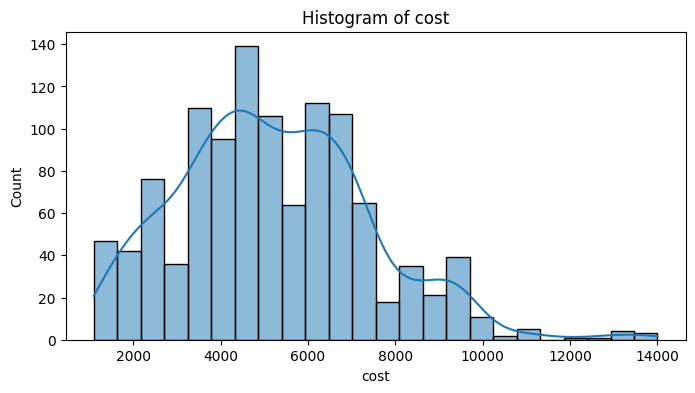

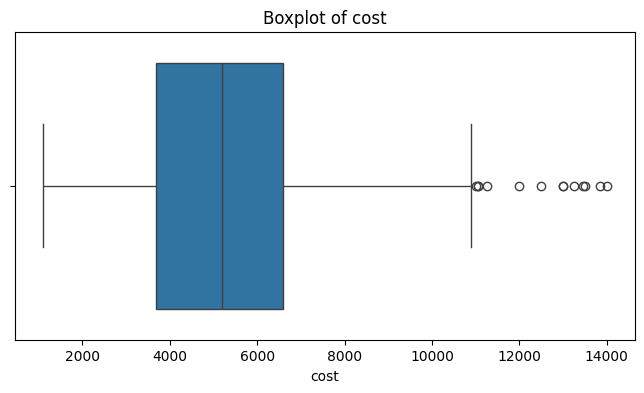

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
numerical_cols = df.select_dtypes(include='number').columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

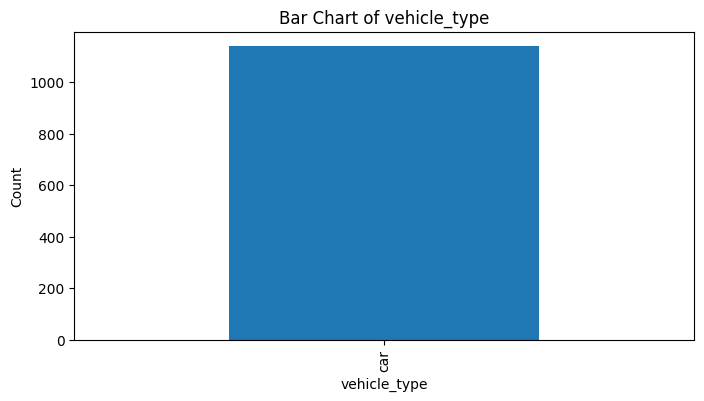

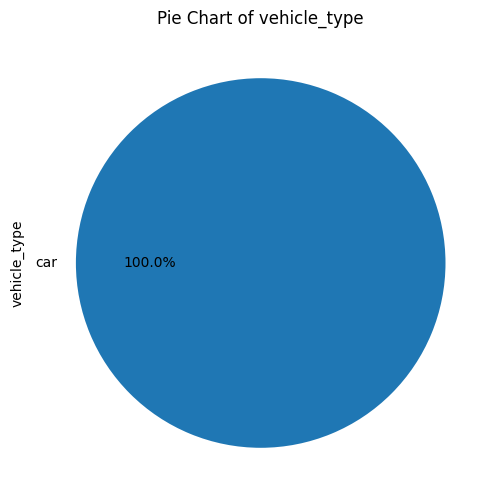

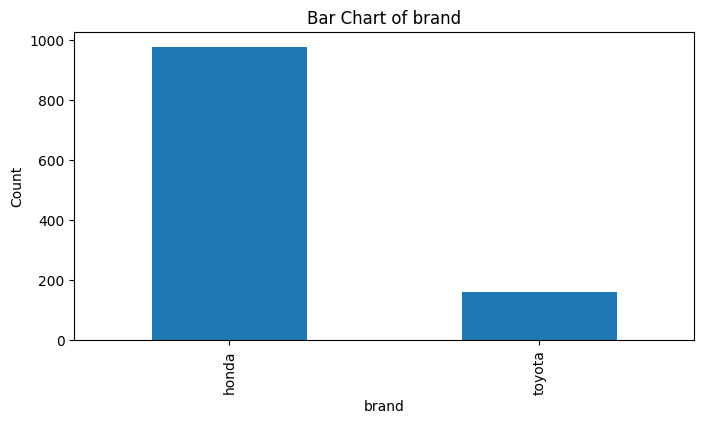

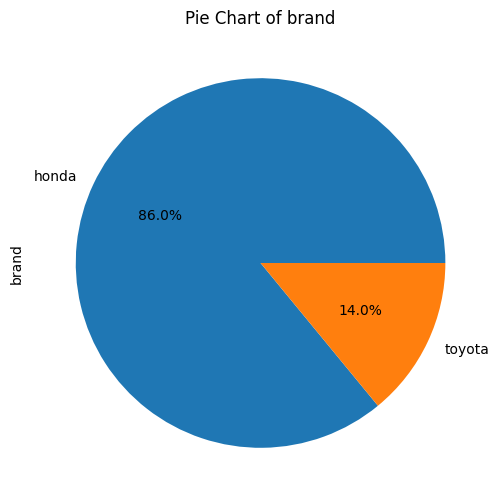

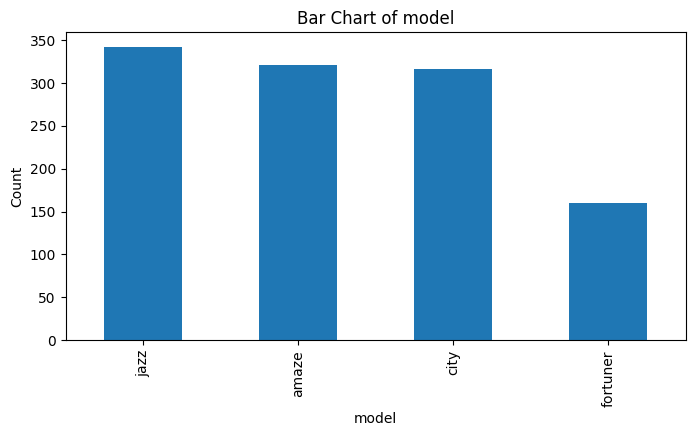

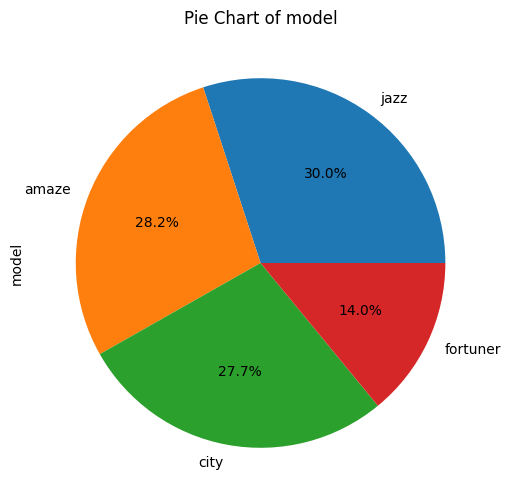

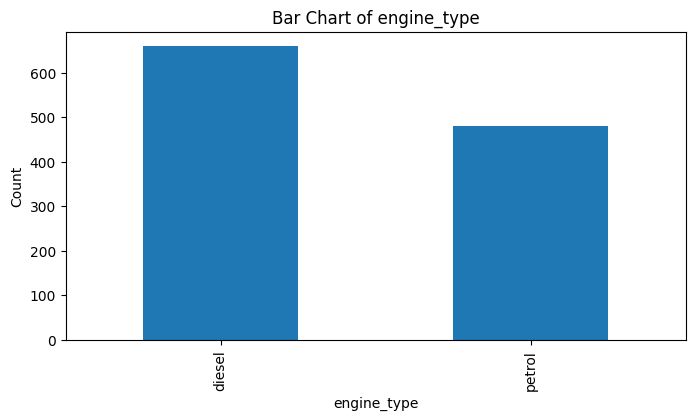

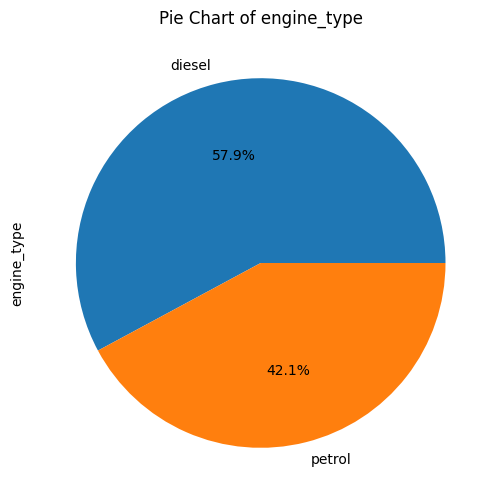

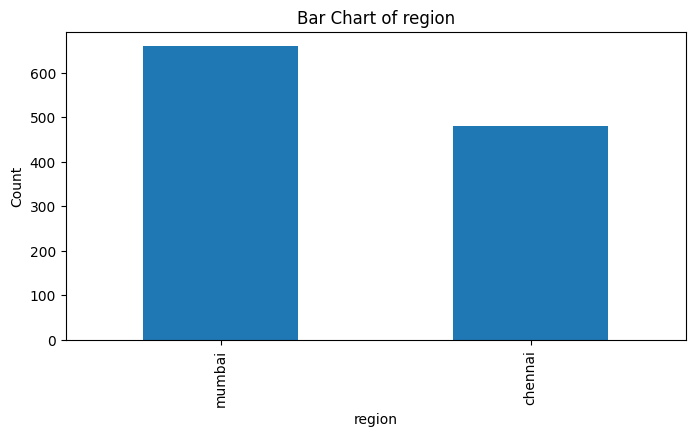

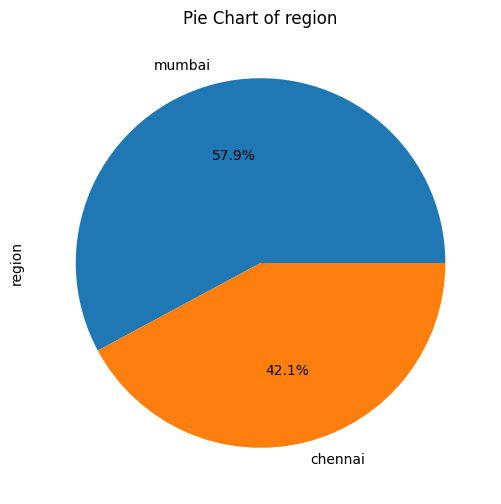

In [279]:
categorical_cols = df.select_dtypes(exclude='number').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {col}')
    plt.show()

C:\Users\ASUS VivoBook\AppData\Local\Temp\ipykernel_8220\3169171290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


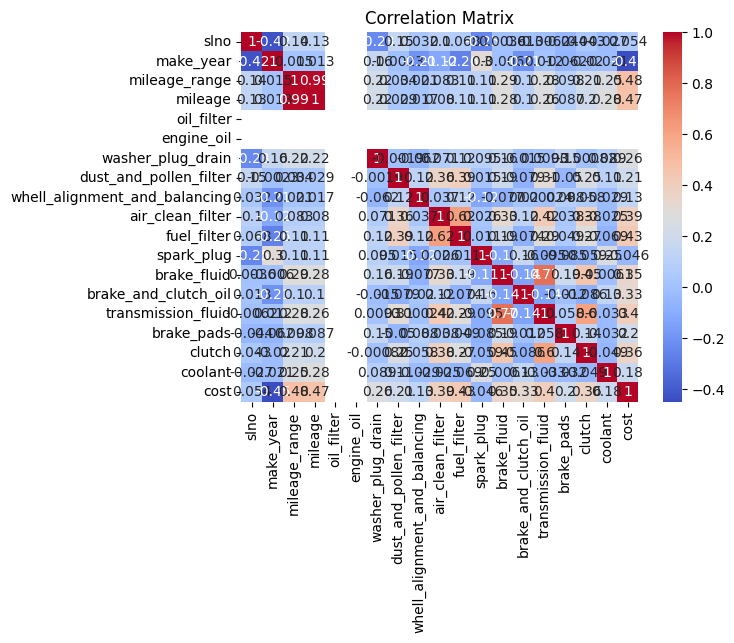

In [280]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [281]:
col_to_drop = ['slno','vehicle_type','region']
df.drop(columns=col_to_drop, inplace=True)

In [282]:
df.columns

Index(['brand', 'model', 'engine_type', 'make_year', 'mileage_range',
       'mileage', 'oil_filter', 'engine_oil', 'washer_plug_drain',
       'dust_and_pollen_filter', 'whell_alignment_and_balancing',
       'air_clean_filter', 'fuel_filter', 'spark_plug', 'brake_fluid',
       'brake_and_clutch_oil', 'transmission_fluid', 'brake_pads', 'clutch',
       'coolant', 'cost'],
      dtype='object')

In [283]:
unique_values = df[['brand', 'model', 'engine_type', 'make_year']].apply(lambda x: x.unique())
print(unique_values)

brand                        [honda, toyota]
model          [jazz, amaze, city, fortuner]
engine_type                 [petrol, diesel]
make_year                 [2017, 2016, 2018]
dtype: object


In [284]:
numerical_cols = ['mileage','mileage_range']  # Define the list of numerical columns

min_values = df[numerical_cols].min()
max_values = df[numerical_cols].max()

print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)


Minimum values:
mileage           9021
mileage_range    10000
dtype: int64

Maximum values:
mileage          137822
mileage_range    100000
dtype: int64


In [285]:
# Calculate current year and age of the vehicle
df['current_year'] = pd.to_datetime('now').year
df['age_of_vehicle'] = df['current_year'] - df['make_year']

# Feature engineering for maintenance percentage
maintenance_cols = ['oil_filter', 'engine_oil', 'washer_plug_drain',
       'dust_and_pollen_filter', 'whell_alignment_and_balancing',
       'air_clean_filter', 'fuel_filter', 'spark_plug', 'brake_fluid',
       'brake_and_clutch_oil', 'transmission_fluid', 'brake_pads', 'clutch',
       'coolant']
for col in maintenance_cols:
    df[f'{col}_percentage'] = df[col] / df['mileage']

# One-hot encoding for categorical variables
categorical_cols = ['brand', 'model', 'engine_type','make_year']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True to avoid multicollinearity

# Normalizing numerical features
numerical_cols = ['mileage', 'mileage_range']
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

# Checking the modified DataFrame
print(df.head())

   mileage_range   mileage  oil_filter  engine_oil  washer_plug_drain  \
0      -1.431486 -1.361884           1           1                  0   
1      -1.431486 -1.359831           1           1                  0   
2      -1.431486 -1.388765           1           1                  0   
3      -1.431486 -1.376796           1           1                  0   
4      -1.431486 -1.414599           1           1                  0   

   dust_and_pollen_filter  whell_alignment_and_balancing  air_clean_filter  \
0                       0                              1                 0   
1                       0                              1                 0   
2                       0                              0                 0   
3                       0                              0                 0   
4                       0                              0                 0   

   fuel_filter  spark_plug  ...  brake_pads_percentage  clutch_percentage  \
0            0 

C:\Users\ASUS VivoBook\AppData\Local\Temp\ipykernel_8220\2367706129.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['current_year'] = pd.to_datetime('now').year


In [286]:
df.columns

Index(['mileage_range', 'mileage', 'oil_filter', 'engine_oil',
       'washer_plug_drain', 'dust_and_pollen_filter',
       'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
       'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
       'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost',
       'current_year', 'age_of_vehicle', 'oil_filter_percentage',
       'engine_oil_percentage', 'washer_plug_drain_percentage',
       'dust_and_pollen_filter_percentage',
       'whell_alignment_and_balancing_percentage',
       'air_clean_filter_percentage', 'fuel_filter_percentage',
       'spark_plug_percentage', 'brake_fluid_percentage',
       'brake_and_clutch_oil_percentage', 'transmission_fluid_percentage',
       'brake_pads_percentage', 'clutch_percentage', 'coolant_percentage',
       'brand_toyota', 'model_city', 'model_fortuner', 'model_jazz',
       'engine_type_petrol', 'make_year_2017', 'make_year_2018'],
      dtype='object')

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' contains your preprocessed DataFrame with features and target variable

# Splitting the data into features and target variable
X = df.drop('cost', axis=1)  # Features
y = df['cost']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [289]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor())
]

In [290]:
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print evaluation metrics (e.g., Mean Squared Error, R^2 score)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print('-' * 50)

Linear Regression Metrics:
Mean Squared Error: 1261429.6622807018
R^2 Score: 0.745230858420298
--------------------------------------------------
Decision Tree Regressor Metrics:
Mean Squared Error: 821275.8760964912
R^2 Score: 0.8341280879863595
--------------------------------------------------


Random Forest Regressor Metrics:
Mean Squared Error: 557198.11419198
R^2 Score: 0.8874634952012644
--------------------------------------------------


The Decision Tree Regressor and Random Forest Regressor are performing significantly better than the Linear Regression model, based on the evaluation metrics. The Decision Tree Regressor has a lower Mean Squared Error (MSE) and a higher R^2 score compared to Linear Regression.
The Random Forest Regressor has even lower MSE and a higher R^2 score, indicating a better fit to the data than the Decision Tree and Linear Regression models.

**Model Selection**

The Random Forest Regressor appears to be the best model among the ones evaluated for predicting the 'cost' variable. It has the lowest Mean Squared Error (MSE) and the highest R^2 score, indicating better performance and a closer fit to the data compared to the other models.

In [291]:
# Make tha random forest model with specific best hyperparameters.
model = RandomForestRegressor()

# Fit the model.
model.fit(X_train, y_train)

# Predict y-predict.
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics (e.g., Mean Squared Error, R^2 score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"{name} Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Random Forest Regressor Metrics:
Mean Squared Error: 556365.8152906555
R^2 Score: 0.8876315934178902


In [292]:
import joblib

# Assuming 'model' is your trained DecisionTreeClassifier
joblib.dump(model, '../models/car_maintenance.joblib')

['../models/car_maintenance.joblib']

## Feature Importance

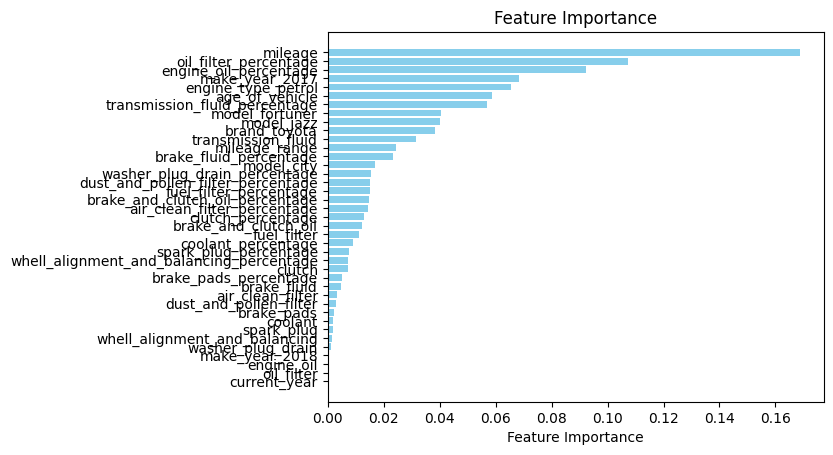

In [293]:
# Get feature importances
feature_importance = model.feature_importances_

# Sort feature importance indices
sorted_idx = np.argsort(feature_importance)

# Retrieve feature names
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()